## Search and Pull Reddit posts & comments

### Install PRAW
PMAW: Pushshift Multithread API Wrapper
-- pip install pmaw

Guides: 
* https://praw.readthedocs.io/en/latest/getting_started/authentication.html
* https://github.com/reddit-archive/reddit/wiki/OAuth2

In [5]:
import pandas as pd
import time
import matplotlib.pyplot as plt

import os
from dotenv import load_dotenv
load_dotenv()

import praw
from pmaw import PushshiftAPI

#initiate
api = PushshiftAPI()

reddit = praw.Reddit(
    client_id=os.getenv('PRAW_CLIENT_ID'),
    client_secret=os.getenv('PRAW_CLIENT_SECRET'),
    password=os.getenv('PRAW_CLIENT_PASSSWORD'),
    user_agent=os.getenv('PRAW_TESTCRIPT'),
    username=os.getenv('REDDIT_USERNAME'),
)

print(reddit.user.me())

Sleep_Deprived1002


### Scrapping posts and comments from subreddit
scraping guide: https://medium.com/@archanakkokate/scraping-reddit-data-using-python-and-praw-a-beginners-guide-7047962f5d29

In [ ]:
#create dictionary of keywords to loop through submissions with title and/body 'symptoms', 'symptom', 'sign', 'signs' 
keywords = ['symptoms', 'symptom', 'signs', 'signs']

data = []

subreddit = reddit.subreddit('pancreaticcancer')

#scrape for posts with these keywords
for keyword in keywords:
    for post in subreddit.search(keyword, 'all'):
        data.append({
            'Type': 'Post',
            'Post_id': post.id,
            'Title': post.title,
            'Author': post.author.name if post.author else 'Unknown',
            'Timestamp': post.created_utc,
            'Text': post.selftext,
            'Score': post.score,
            'Flair': post.link_flair_text,
            'Total_comments': post.num_comments,
            'Post_URL': post.url
        })

    # Check if the post has comments
        if post.num_comments > 0:
            # Scraping comments for each post
            post.comments.replace_more(limit= None)
            for comment in post.comments.list():
                data.append({
                    'Type': 'Comment',
                    'Post_id': post.id,
                    'Title': post.title,
                    'Author': comment.author.name if comment.author else 'Unknown',
                    'Timestamp': pd.to_datetime(comment.created_utc, unit='s'),
                    'Text': comment.body,
                    'Score': comment.score,
                    'Total_comments': 0, #Comments don't have this attribute
                    'Post_URL': None  #Comments don't have this attribute
                })
    #add delay between requests to avoid rate limiting (seconds)
        time.sleep(5)

C:\Users\chery\AppData\Local\Temp\ipykernel_9636\716776676.py:12: DeprecationWarning: Positional arguments for 'Subreddit.search' will no longer be supported in PRAW 8.
Call this function with 'sort' as a keyword argument.
  for post in subreddit.search(keyword, 'all'):


In [56]:
#input data to dataframe
pancreatic_cancer_data = pd.DataFrame(data)

In [58]:
pancreatic_cancer_data

,Type,Post_id,Title,Author,Timestamp,Text,Score,Flair,Total_comments,Post_URL
0,Post,1bom69c,How long did you have symptoms before you got ...,Regular-Exchange-557,1711494354.0,I know this has been asked but I’m curious how...,29,"worried, no diagnosis",308,https://www.reddit.com/r/pancreaticcancer/comm...
1,Comment,1bom69c,How long did you have symptoms before you got ...,gage1a,2024-03-27 19:42:21,They say hindsight is 20/20 and in my wife's c...,16,NaN,0,None
2,Comment,1bom69c,How long did you have symptoms before you got ...,Lopsided-Dot9554,2024-03-26 23:34:50,My dad had started complaining of a stomach ac...,15,NaN,0,None
3,Comment,1bom69c,How long did you have symptoms before you got ...,Dazzling-March7258,2024-03-26 23:34:20,Had back pain for a month or more before diagn...,12,NaN,0,None
4,Comment,1bom69c,How long did you have symptoms before you got ...,Emergency_Wrangler68,2024-03-27 02:50:02,I was complaining to my PCP for EIGHTEEN MONTH...,10,NaN,0,None
...,...,...,...,...,...,...,...,...,...,...
8087,Comment,1idp81z,Grandma been in excruciating pain for hours me...,ddessert,2025-01-31 03:23:37,Perhaps a nerve block? It's a procedure where ...,3,NaN,0,None
8088,Comment,1idp81z,Grandma been in excruciating pain for hours me...,Chewable-Chewsie,2025-01-31 03:08:30,Darn. I’m sorry to hear that. Keep letting us ...,1,NaN,0,None
8089,Comment,1idp81z,Grandma been in excruciating pain for hours me...,Remarkable_Lie7839,2025-01-31 03:50:04,I asked about it once before but they said it ...,1,NaN,0,None
8090,Comment,1idp81z,Grandma been in excruciating pain for hours me...,ddessert,2025-01-31 04:56:03,Sometimes you have to wonder if the real reaso...,1,NaN,0,None


In [ ]:
# Save DataFrame to JSON, locally 
pancreatic_cancer_data.to_json('/data/pancreatic_cancer_data_filtered.json', orient='records', lines=True)

#Save DataFrame to CSV, locally
pancreatic_cancer_data.to_csv('/data/pancreatic_cancer_data_filtered.csv')


### Data Cleaning

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Read JSON
pc_data = pd.read_json('/data/pancreatic_cancer_data_filtered.json', lines=True)

# Remove duplicates based on the 'id' column
pc_df = pc_data.drop_duplicates(subset=['Post_id','Title', 'Author','Text'])

# Drop redundant columns
pc_df.drop(['Score','Flair','Total_comments','Post_URL'], axis=1, inplace=True)
pc_df.head()

,Type,Post_id,Title,Author,Timestamp,Text
0,Post,1bom69c,How long did you have symptoms before you got ...,Regular-Exchange-557,1970-01-20 19:24:54.354,I know this has been asked but I’m curious how...
1,Comment,1bom69c,How long did you have symptoms before you got ...,gage1a,2024-03-27 19:42:21.000,They say hindsight is 20/20 and in my wife's c...
2,Comment,1bom69c,How long did you have symptoms before you got ...,Lopsided-Dot9554,2024-03-26 23:34:50.000,My dad had started complaining of a stomach ac...
3,Comment,1bom69c,How long did you have symptoms before you got ...,Dazzling-March7258,2024-03-26 23:34:20.000,Had back pain for a month or more before diagn...
4,Comment,1bom69c,How long did you have symptoms before you got ...,Emergency_Wrangler68,2024-03-27 02:50:02.000,I was complaining to my PCP for EIGHTEEN MONTH...


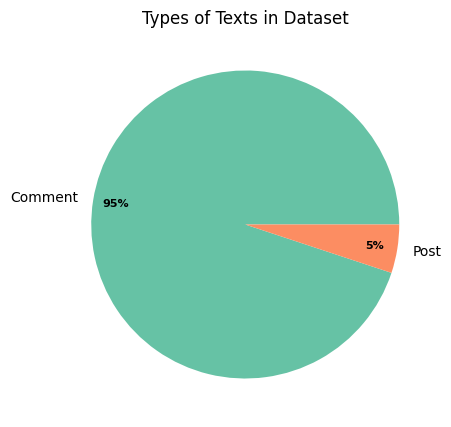

In [ ]:
# Understanding your dataset: what are the type of texts? posts or comments?
text_type_df = (pd.DataFrame(
    pc_df.value_counts('Type')
    .reset_index()
))

text_type_df.columns = ['Type', 'count']

colors = sns.color_palette("Set2")
fig, ax = plt.subplots(figsize=(6, 5), subplot_kw=dict(aspect="equal"))
# Function to only show percentage if it's above 5%
def func(pct, allvals):
    return f"{pct:.0f}%"

# Determine explode values: exploding slices less than 5%
#explode = [0.2 if (x/sum(flair_df['count']) * 100) < 1 else 0 for x in flair_df['count']]

# Creating the pie chart with conditional labeling and exploding
wedges, texts, autotexts = ax.pie(text_type_df['count'], labels=text_type_df['Type'], autopct=lambda pct: func(pct, text_type_df['count']),
                                  textprops={'color': "black"}, colors=colors, pctdistance=0.85, labeldistance=1.1)
                                         
plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Types of Texts in Dataset")                                        
plt.show()

In [ ]:
''' Fix timestamp error '''

# Get Post_ids with mistype timestamps
pc_df['Year'] = pc_df['Timestamp'].dt.year
mistyped = pc_df[(pc_df['Year'] < 2000) | (pc_df['Year'] > 2025)]

pd.set_option('display.max_rows', None)
post_ids_to_fix = mistyped['Post_id'].unique()  

# Change to correct timestamps
for post_id in post_ids_to_fix:
    try:
        submission = reddit.submission(id=post_id)
        correct_timestamp = pd.to_datetime(submission.created_utc, unit='s')

        # Update all rows with this post_id
        mask = mistyped['Post_id'] == post_id
        mistyped.loc[mask, 'Timestamp'] = correct_timestamp
        mistyped.loc[mask, 'Date'] = correct_timestamp.date()
        mistyped.loc[mask, 'Year'] = correct_timestamp.year

        print(f"Updated timestamps for Post_id {post_id} to {correct_timestamp}")

    except Exception as e:
        print(f"Error fetching post {post_id}: {e}")

#Merge updated to main dataset
pc_df_upd = pc_df #create copy

pc_df_upd.set_index('Post_id', inplace=True)
mistyped.set_index('Post_id', inplace=True)

# Update timestamp columns from mistyped to pc_df
pc_df_upd.update(mistyped[['Timestamp', 'Date', 'Year']])

# reset index 
pc_df_upd.reset_index(inplace=True)

pc_df_upd

,Post_id,Type,Title,Author,Timestamp,Text,Date,Year
0,1bom69c,Post,How long did you have symptoms before you got ...,Regular-Exchange-557,2024-03-27 19:24:54.354,I know this has been asked but I’m curious how...,2024-03-27,2024
1,1bom69c,Comment,How long did you have symptoms before you got ...,gage1a,2024-03-27 19:42:21.000,They say hindsight is 20/20 and in my wife's c...,2024-03-27,2024
2,1bom69c,Comment,How long did you have symptoms before you got ...,Lopsided-Dot9554,2024-03-26 23:34:50.000,My dad had started complaining of a stomach ac...,2024-03-26,2024
3,1bom69c,Comment,How long did you have symptoms before you got ...,Dazzling-March7258,2024-03-26 23:34:20.000,Had back pain for a month or more before diagn...,2024-03-26,2024
4,1bom69c,Comment,How long did you have symptoms before you got ...,Emergency_Wrangler68,2024-03-27 02:50:02.000,I was complaining to my PCP for EIGHTEEN MONTH...,2024-03-27,2024
...,...,...,...,...,...,...,...,...
3850,1idp81z,Comment,Grandma been in excruciating pain for hours me...,ddessert,2025-01-30 15:17:38.000,Perhaps a nerve block? It's a procedure where ...,2025-01-30,2025
3851,1idp81z,Comment,Grandma been in excruciating pain for hours me...,Chewable-Chewsie,2025-01-30 15:17:38.000,Darn. I’m sorry to hear that. Keep letting us ...,2025-01-30,2025
3852,1idp81z,Comment,Grandma been in excruciating pain for hours me...,Remarkable_Lie7839,2025-01-30 15:17:38.000,I asked about it once before but they said it ...,2025-01-30,2025
3853,1idp81z,Comment,Grandma been in excruciating pain for hours me...,ddessert,2025-01-30 15:17:38.000,Sometimes you have to wonder if the real reaso...,2025-01-30,2025


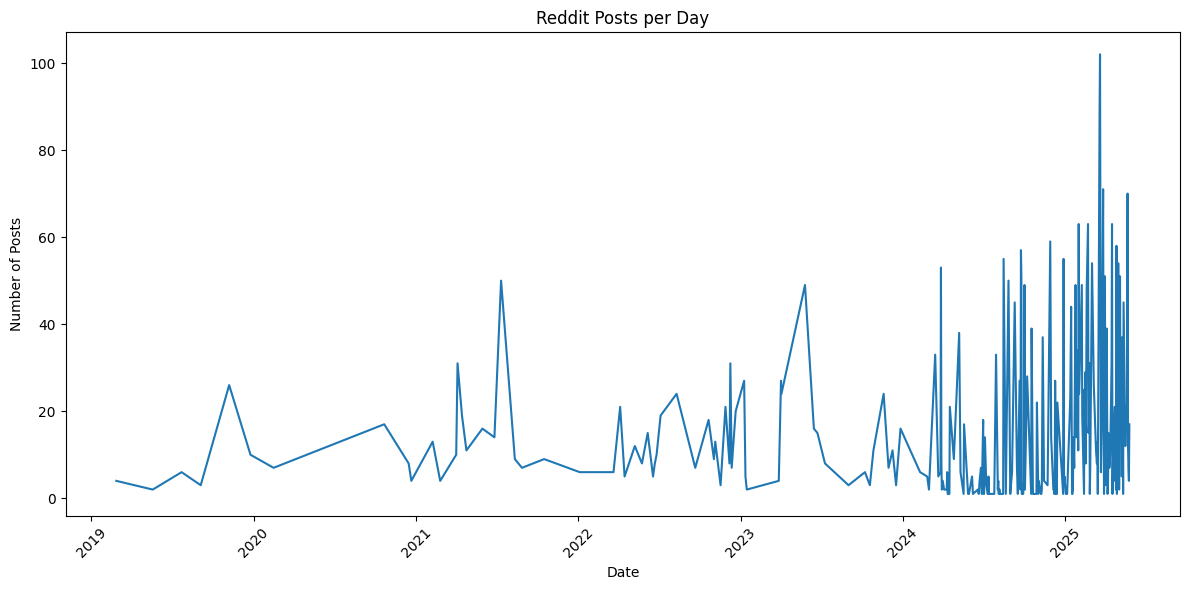

In [ ]:
#Convert timestamp to datetime
pc_df_upd['Timestamp'] = pd.to_datetime(pc_df_upd['Timestamp'])

pc_df_upd['Date'] = pc_df_upd['Timestamp'].dt.date
posts_per_day = pc_df_upd.groupby('Date').size()

#plot with matplotlib.pyplot
plt.figure(figsize=(12,6))
posts_per_day.plot(kind='line')  # You can also use 'bar'
plt.title('Reddit Posts per Day')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
''' Get final cleaned dataset '''

pc_df_upd = (pc_df_upd.drop(['Type', 'Title', 'Author', 'Timestamp'],axis=1))

# Save DataFrame to JSON, locally
pc_df_upd.to_json('/data/pc_df_clean.json', orient='records', lines=True)


#Save DataFrame to CSV, locally
pc_df_upd.to_csv('/data/pc_df_clean.csv')

pc_df_upd

,Post_id,Text,Date,Year
0,1bom69c,I know this has been asked but I’m curious how...,2024-03-27,2024
1,1bom69c,They say hindsight is 20/20 and in my wife's c...,2024-03-27,2024
2,1bom69c,My dad had started complaining of a stomach ac...,2024-03-26,2024
3,1bom69c,Had back pain for a month or more before diagn...,2024-03-26,2024
4,1bom69c,I was complaining to my PCP for EIGHTEEN MONTH...,2024-03-27,2024
...,...,...,...,...
3850,1idp81z,Perhaps a nerve block? It's a procedure where ...,2025-01-30,2025
3851,1idp81z,Darn. I’m sorry to hear that. Keep letting us ...,2025-01-30,2025
3852,1idp81z,I asked about it once before but they said it ...,2025-01-30,2025
3853,1idp81z,Sometimes you have to wonder if the real reaso...,2025-01-30,2025


In [ ]:
''' Prepare text for initial anlaysis '''
import re
import string
import numpy as np

def clean_text(text):
    # Convert to string first to avoid errors with regex
    if pd.isna(text) or str(text).strip() == "":
        return np.nan  # Treat empty or missing values as NaN
    
    # Convert to lower case
    text = str(text).lower()
    
    # Remove URLs
    text = re.sub(r'http[s]?://\S+', '', text)

    # Remove unwanted special characters, keep common punctuation
    text = re.sub(r"[^a-zA-Z0-9\s.,!?;:'\"()\[\]\-]", '', text)

    # Replace line breaks and extra spaces with a single space
    text = text.replace('\n', ' ').strip()
    text = re.sub(r'\s+', ' ', text)
    
    return text

In [ ]:
pc_df_upd['clean_text'] = pc_df_upd['Text'].apply(clean_text)
pc_df_upd['clean_text']

# drop missing values
pc_df_upd.dropna(subset=['clean_text'], inplace=True)
pc_df_upd.to_csv('/data/pc_df_clean.csv')


,Post_id,Text,Date,Year,clean_text
0,1bom69c,I know this has been asked but I’m curious how...,2024-03-27,2024,i know this has been asked but im curious how ...
1,1bom69c,They say hindsight is 20/20 and in my wife's c...,2024-03-27,2024,they say hindsight is 2020 and in my wife's ca...
2,1bom69c,My dad had started complaining of a stomach ac...,2024-03-26,2024,my dad had started complaining of a stomach ac...
3,1bom69c,Had back pain for a month or more before diagn...,2024-03-26,2024,had back pain for a month or more before diagn...
4,1bom69c,I was complaining to my PCP for EIGHTEEN MONTH...,2024-03-27,2024,i was complaining to my pcp for eighteen month...
...,...,...,...,...,...
3850,1idp81z,Perhaps a nerve block? It's a procedure where ...,2025-01-30,2025,perhaps a nerve block? it's a procedure where ...
3851,1idp81z,Darn. I’m sorry to hear that. Keep letting us ...,2025-01-30,2025,darn. im sorry to hear that. keep letting us k...
3852,1idp81z,I asked about it once before but they said it ...,2025-01-30,2025,i asked about it once before but they said it ...
3853,1idp81z,Sometimes you have to wonder if the real reaso...,2025-01-30,2025,sometimes you have to wonder if the real reaso...


In [ ]:
from huggingface_hub import login, notebook_login, HfApi
login(token= os.getenv('HUGGINGFACE_TOKEN'))

api.upload_file(
    path_or_fileobj="/data/pc_df_clean.csv",
    path_in_repo="rpancreatic_cancer_symptoms",
    repo_id=os.getenv(f"HF_REPO_ID" + "rpancreatic_cancer_symptoms"),
    repo_type="dataset",
)